# Have to build customer segmentation dashboard
The winning apps will be judged according to the following categories:

* Ability to provide insight on the relationship between churn and customers’ characteristics
* App Design
* Data exploration and data analysis routines (e.g. numerical methods, machine learning, prediction, classification, optimization)

In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv("telco-customer-churn-by-IBM.csv")

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes


In [5]:
import skimpy

In [6]:
skimpy.skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7043   │ │ string      │ 18    │                                                          │
│ │ Number of columns │ 21     │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0   ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ SeniorCitizen          │    0 │       0 │    0.16 │    0.37 │    0 │      0 │      0 │       1 │  █    ▂   │  │
│ │ tenure                 │    0 │       0 │      32 │      25 │    0 │      9 │     55 │      72 │  █▄▃▃▃▆   │  │
│ │ MonthlyCharges         │    0 │       0 │      65 │      30 │   18 │     36 │     90 │     120 │  █▃▄▇▇▃   │  │
│ └────────────────────────┴──────┴─────────┴─────────┴─────────┴──────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ customerID                       │      0 │         0 │                          1 │                  7000 │  │
│ │ gender                           │      0 │         0 │                          1 │                  7000 │  │
│ │ Partner                          │      0 │         0 │                          1 │                  7000 │  │
│ │ Dependents                       │      0 │         0 │                          1 │                  7000 │  │
│ │ PhoneService                     │      0 │         0 │                          1 │                  7000 │  │
│ │ MultipleLines                    │      0 │         0 │                          1 │                  7000 │  │
│ │ InternetService                  │      0 │         0 │                          1 │                  7000 │  │
│ │ OnlineSecurity                   │      0 │         0 │                          1 │                  7000 │  │
│ │ OnlineBackup                     │      0 │         0 │                          1 │                  7000 │  │
│ │ DeviceProtection                 │      0 │         0 │                          1 │                  7000 │  │
│ │ TechSupport                      │      0 │         0 │                          1 │                  7000 │  │
│ │ StreamingTV                      │      0 │         0 │                          1 │                  7000 │  │
│ │ StreamingMovies                  │      0 │         0 │                          1 │                  7000 │  │
│ │ Contract                         │      0 │         

In [7]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: Int64

# Establishing the relationship between churn and other columns 

```
Churn Yes: the customer left the company. 
Churn No: the customer didn't remained with company.
```

In [8]:
import plotly.express as px 

In [23]:
streaming_movies_data = pd.DataFrame(data['StreamingMovies'].value_counts()).reset_index(drop = False ).rename(columns = {'index' : 'Type'})

In [26]:
streaming_movies_data

,Type,StreamingMovies
0,No,2785
1,Yes,2732
2,No internet service,1526


In [30]:
px.pie(streaming_movies_data , values = "StreamingMovies" , color = "Type", hole = 0.3)

In [10]:
px.histogram(data, x="Churn", color = "SeniorCitizen", title = "Customer churn and senior citizen distribution",
template = "plotly_dark", barmode = "group")

In [11]:
data.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: Int64

In [12]:
px.histogram(data, x = "PaymentMethod" , color = "Churn", title = "Customer churn and payment method distribution",
template = "plotly_dark", barmode = "group")    

In [13]:
print("hell")

hell


In [14]:
from pycaret.classification import *

In [15]:
# initializing the project 
data = pd.read_csv("telco-customer-churn-by-IBM.csv")
data = data.drop(columns = ["customerID"])
data = data.dropna()
data = data.reset_index(drop = True)
data = data.drop_duplicates()


In [55]:
def data_preprocess(data): 
    data["TotalCharges"] = data["TotalCharges"].replace(" ", 0)
    data["TotalCharges"] = data["TotalCharges"].astype("float")
    data["MonthlyCharges"] = data["MonthlyCharges"].astype("float")
    data["tenure"] = data["tenure"].astype("int")

print(data_preprocess(data))






None


In [58]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [17]:
# initializing the project 
exp_clf = setup(data = data, target = 'Churn', session_id = 123, normalize = True,
                transformation = True)
                

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7021, 20)"
5,Transformed data shape,"(7021, 41)"
6,Transformed train set shape,"(4914, 41)"
7,Transformed test set shape,"(2107, 41)"
8,Ordinal features,5
9,Numeric features,3


In [18]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8075,0.8407,0.5238,0.6762,0.5893,0.4664,0.4735,2.5960
ridge,Ridge Classifier,0.8040,0.0000,0.4877,0.6824,0.5674,0.4455,0.4568,0.5000
ada,Ada Boost Classifier,0.8036,0.8394,0.5238,0.6653,0.5847,0.4587,0.4652,0.8380
lda,Linear Discriminant Analysis,0.8026,0.8366,0.5323,0.6567,0.5865,0.4591,0.4643,0.6910
gbc,Gradient Boosting Classifier,0.8020,0.8410,0.5108,0.6634,0.5760,0.4500,0.4571,1.0890
catboost,CatBoost Classifier,0.7991,0.8369,0.5046,0.6579,0.5694,0.4418,0.4493,6.0830
lightgbm,Light Gradient Boosting Machine,0.7932,0.8278,0.5031,0.6388,0.5613,0.4290,0.4351,0.7610
xgboost,Extreme Gradient Boosting,0.7873,0.8164,0.5177,0.6165,0.5617,0.4230,0.4265,1.3080
rf,Random Forest Classifier,0.7849,0.8065,0.4585,0.6279,0.5287,0.3942,0.4029,0.8950
svm,SVM - Linear Kernel,0.7692,0.0000,0.5400,0.5786,0.5476,0.3953,0.4024,0.5330


In [19]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [31]:
best.classes_

array([0, 1])

In [33]:
best.coef_

array([[-6.29783634e-04,  6.31167484e-02,  2.84112123e-02,
        -8.96319697e-02, -8.88643121e-01, -4.44698554e-03,
         4.44698554e-03, -1.25804908e-01,  1.24823183e-01,
        -2.80315452e-01,  3.43115023e-01, -8.96873921e-02,
        -2.90744284e-02,  9.99135542e-02, -8.96873921e-02,
         3.88239182e-02,  3.68127531e-02, -8.96873921e-02,
         1.33983895e-02,  6.31836135e-02, -8.96873921e-02,
         8.13600845e-02, -8.56947543e-03, -8.96873921e-02,
         1.24557655e-01, -4.85420517e-02, -8.96873921e-02,
        -5.72820345e-02,  1.33061648e-01, -8.96873921e-02,
         2.79672644e-01, -3.25431752e-01,  4.21343121e-04,
         1.73823551e-01, -8.36234841e-03,  1.01665575e-01,
        -4.77881851e-02, -5.95163528e-02, -4.31855765e-01,
         1.68545135e-02]])

In [44]:
from sklearn.feature_selection import RFE
from pycaret.classification import get_data
rfe = RFE(best)
X, y = get_data(exp_clf)
rfe = rfe.fit(X,y)

# Print the most important features
print(exp[0].columns[rfe.support_])

ImportError: cannot import name 'get_data' from 'pycaret.classification' (/home/somesh/.local/lib/python3.10/site-packages/pycaret/classification/__init__.py)

In [50]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [46]:
# Extract the coefficients
coefficients = best.coef_[0]

# Create a DataFrame to hold the coefficients
coefficients_df = pd.DataFrame({'feature': data.columns, 'coefficient': coefficients})

# Sort the coefficients by their absolute value
sorted_coefficients = coefficients_df.sort_values(by='coefficient', ascending=False, abs=True)

# Print the sorted coefficients
print(sorted_coefficients)

ValueError: All arrays must be of the same length

In [48]:
len(coefficients)

40

In [49]:
len(data.columns)

20

In [25]:
get_config('feature_importance')

ValueError: Variable 'feature_importance' not found. Possible variables are: ['test', 'variables', 'is_multiclass', 'dataset_transformed', 'y_test', 'gpu_param', 'X_train_transformed', 'memory', 'fold_shuffle_param', 'gpu_n_jobs_param', 'X_train', 'X', 'X_test_transformed', 'exp_id', 'y_test_transformed', 'exp_name_log', 'logging_param', 'train', 'y_transformed', 'test_transformed', 'seed', '_available_plots', 'X_test', 'n_jobs_param', 'y_train', '_ml_usecase', 'data', 'train_transformed', 'idx', 'variable_and_property_keys', 'X_transformed', 'target_param', 'fold_groups_param', 'fold_generator', 'html_param', 'log_plots_param', 'y', 'dataset', 'pipeline', 'fix_imbalance', 'USI', 'y_train_transformed']

In [18]:
tuned_model = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8028,0.8286,0.5397,0.6355,0.5837,0.4557,0.4583
1,0.8110,0.8635,0.5476,0.6571,0.5974,0.4752,0.4786
2,0.8069,0.8275,0.5635,0.6396,0.5992,0.4727,0.4743
3,0.8557,0.8815,0.6429,0.7570,0.6953,0.6016,0.6050
4,0.8208,0.8428,0.5280,0.6947,0.6000,0.4873,0.4949
5,0.8147,0.8621,0.6111,0.6471,0.6286,0.5052,0.5056
6,0.8147,0.8596,0.5317,0.6768,0.5956,0.4776,0.4834
7,0.7780,0.8045,0.4524,0.5876,0.5112,0.3707,0.3760
8,0.7800,0.8032,0.4603,0.5918,0.5179,0.3782,0.3833


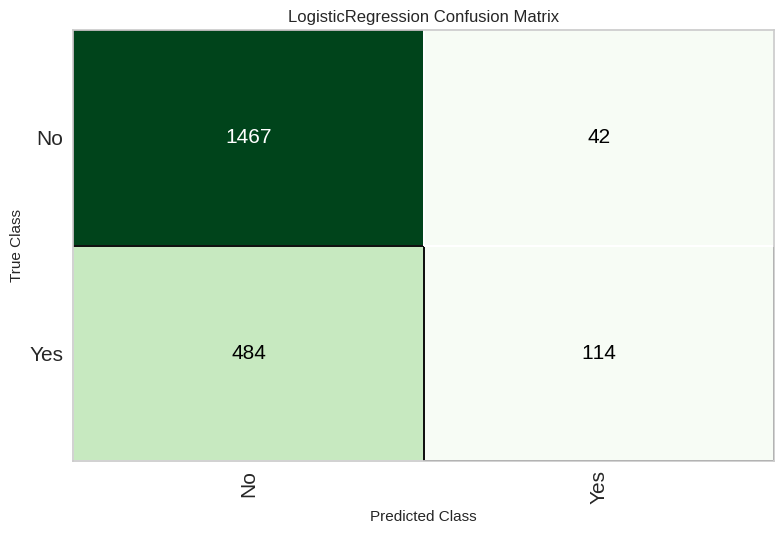

In [19]:
plot_model(tuned_model, plot = "confusion_matrix")

In [20]:
save_model(tuned_model, "lr_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=3.882, class_weight={}, dual=False,
                 

In [27]:
data.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [34]:
tuned_model.predict_proba(data.head(1))

/home/somesh/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Churn
- Contract
- DeviceProtection
- InternetService
- MultipleLines
- ...
Feature names seen at fit time, yet now missing:
- Contract_Month-to-month
- Contract_One year
- Contract_Two year
- DeviceProtection_No
- DeviceProtection_No internet service
- ...




ValueError: could not convert string to float: 'Female'

In [35]:
predict_model(tuned_model, data = data.head(1))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.0000,0,0,0,0,0.0000,0.0000


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_No phone service,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineBackup_No,OnlineBackup_Yes,OnlineBackup_No internet service,DeviceProtection_No,DeviceProtection_Yes,DeviceProtection_No internet service,TechSupport_No,TechSupport_Yes,TechSupport_No internet service,StreamingTV_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_Yes,StreamingMovies_No internet service,Contract_Month-to-month,Contract_Two year,Contract_One year,PaperlessBilling,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
0,-1.012285,-0.446886,1.039019,-0.659034,-1.662876,-3.057002,3.057002,-0.971509,-0.847102,1.370669,-0.883787,-0.521917,-0.636241,1.004487,-0.521917,-0.884884,1.372517,-0.521917,1.138535,-0.734489,-0.521917,1.008994,-0.639714,-0.521917,-0.78989,1.220394,-0.521917,1.229222,-0.795676,-0.521917,0.903679,-0.564346,-0.512435,0.819754,-0.543012,1.413566,-0.525703,-0.534522,-1.162551,0.03225,No,Yes,0.6793


In [18]:
data.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


In [20]:
data.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [21]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
data.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [1]:
from pycaret.classification import load_model, predict_model
model = load_model("lr_model")

Transformation Pipeline and Model Successfully Loaded


In [4]:
from pycaret.classification import *



ValueError: Plot Not Available. Please see docstring for list of available Plots.

In [23]:
data.columns.T

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')